In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from utility import *

homedir = get_homedir()

In [2]:
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Get datasets

In [3]:
FIPS_mapping, FIPS_full = get_FIPS(reduced=True)

In [4]:
confirmed_cases = pd.read_csv(f"{homedir}/data/us/covid/confirmed_cases.csv")
confirmed_cases.drop(["County Name", "State", "stateFIPS"], axis=1, inplace=True)
confirmed_cases["countyFIPS"]=confirmed_cases["countyFIPS"].apply(correct_FIPS)
confirmed_cases = fix_FIPS(confirmed_cases, fipslabel="countyFIPS", reduced=True)
confirmed_cases.head()

,countyFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
0,0,0,0,0,0,0,0,0,0,0,...,5755,5721,5744,5807,5239,5474,5707,5876,6232,6369
1,01001,0,0,0,0,0,0,0,0,0,...,25,25,25,25,27,28,30,32,33,36
2,01003,0,0,0,0,0,0,0,0,0,...,98,102,103,109,114,117,123,132,143,147
3,01005,0,0,0,0,0,0,0,0,0,...,13,14,15,18,20,22,28,29,30,32
4,01007,0,0,0,0,0,0,0,0,0,...,19,23,23,26,28,32,32,33,33,34


In [5]:
confirmed_cases = confirmed_cases[(confirmed_cases["countyFIPS"]!='0')]
confirmed_cases = confirmed_cases[(confirmed_cases["countyFIPS"]!='1')]
confirmed_cases.set_index("countyFIPS", inplace=True)
confirmed_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
countyFIPS,,,,,,,,,,,,,,,,,,,,,
01001,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,27,28,30,32,33,36
01003,0,0,0,0,0,0,0,0,0,0,...,98,102,103,109,114,117,123,132,143,147
01005,0,0,0,0,0,0,0,0,0,0,...,13,14,15,18,20,22,28,29,30,32
01007,0,0,0,0,0,0,0,0,0,0,...,19,23,23,26,28,32,32,33,33,34
01009,0,0,0,0,0,0,0,0,0,0,...,17,18,20,20,21,22,26,29,31,31


In [6]:
timeline = confirmed_cases.columns.to_numpy().tolist()
timeline[:10]

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20']

In [7]:
confirmed_cases.rename(columns={i:j for j,i in enumerate(timeline)}, inplace=True)
confirmed_cases.head()

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
countyFIPS,,,,,,,,,,,,,,,,,,,,,
01001,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,27,28,30,32,33,36
01003,0,0,0,0,0,0,0,0,0,0,...,98,102,103,109,114,117,123,132,143,147
01005,0,0,0,0,0,0,0,0,0,0,...,13,14,15,18,20,22,28,29,30,32
01007,0,0,0,0,0,0,0,0,0,0,...,19,23,23,26,28,32,32,33,33,34
01009,0,0,0,0,0,0,0,0,0,0,...,17,18,20,20,21,22,26,29,31,31


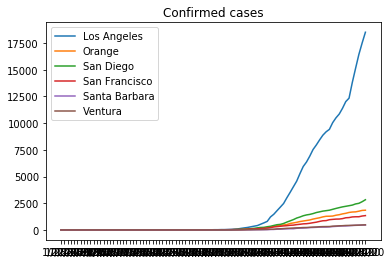

In [8]:
selected_county = {"06037":"Los Angeles", "06059":"Orange", "06073":"San Diego", "06075":"San Francisco", "06083":"Santa Barbara", "06111":"Ventura"}
for fips in selected_county.keys():
    plt.plot(timeline, confirmed_cases.loc[fips], label=selected_county[fips])

plt.legend(loc='upper left')
plt.title("Confirmed cases")
plt.show()

### Redrawn using Plotly

In [9]:
df = pd.read_csv(f"{homedir}/data/us/covid/confirmed_cases.csv")
df.drop(["County Name", "State", "stateFIPS"], axis=1, inplace=True)
df["countyFIPS"] = df["countyFIPS"].apply(correct_FIPS)
df = fix_FIPS(df, fipslabel="countyFIPS", reduced=True)
df = df[(df["countyFIPS"]!='0')]
df = df[(df["countyFIPS"]!='1')]

tidy_df = df.melt(id_vars="countyFIPS", var_name="date", value_name="confirmed cases")
tidy_df["date"] = pd.to_datetime(tidy_df["date"])
tidy_df.head()

,countyFIPS,date,confirmed cases
0,01001,2020-01-22,0
1,01003,2020-01-22,0
2,01005,2020-01-22,0
3,01007,2020-01-22,0
4,01009,2020-01-22,0


In [10]:
tidy_df[(tidy_df["countyFIPS"].isin(set(selected_county.keys())))].tail()

,countyFIPS,date,confirmed cases
292515,06059,2020-04-24,1845
292522,06073,2020-04-24,2826
292523,06075,2020-04-24,1340
292527,06083,2020-04-24,460
292541,06111,2020-04-24,476


In [11]:
import plotly.express as px

tidy_df_selected = tidy_df[(tidy_df["countyFIPS"].isin(set(selected_county.keys())))]

fig = px.line(tidy_df_selected, x="date", y="confirmed cases", color=tidy_df_selected["countyFIPS"].apply(lambda x: selected_county[x]))
fig.show()

In [12]:
first_day = (tidy_df_selected[(tidy_df_selected["confirmed cases"]>0)].iloc[0])["date"]
first_day

Timestamp('2020-01-26 00:00:00')

## DTW

In [4]:
PRB = pd.read_csv(f'{homedir}/JK/prb_international_population.csv')
PRB = PRB[PRB['Type']=='Country'][['FIPS', 'Name', 'Data']]
PRB.head()

,FIPS,Name,Data
3,DZ,Algeria,43.406
4,EG,Egypt,99.064
5,LY,Libya,6.777
6,MA,Morocco,35.587
7,SD,Sudan,42.813


In [11]:
set(JHU_countries).difference(set(PRB['Name']))

{'Bosnia and Herzegovina',
 'Burma',
 'Cabo Verde',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Diamond Princess',
 'Eswatini',
 'Holy See',
 'MS Zaandam',
 'Saint Kitts and Nevis',
 'Saint Vincent and the Grenadines',
 'Taiwan*',
 'US',
 'West Bank and Gaza'}

In [12]:
set(PRB['Name']).difference(set(JHU_countries))

{'Bosnia-Herzegovina',
 'Cape Verde',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Congo',
 'Congo, Dem. Rep.',
 'Curacao',
 'Federated States of Micronesia',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Guam',
 'Kiribati',
 'Korea, North',
 'Lesotho',
 'Marshall Islands',
 'Martinique',
 'Mayotte',
 'Myanmar',
 'Nauru',
 'New Caledonia',
 'Palau',
 'Palestinian Territory',
 'Puerto Rico',
 'Reunion',
 'Samoa',
 'Solomon Islands',
 'St. Kitts-Nevis',
 'St. Vincent and the Grenadines',
 'Taiwan',
 'Tonga',
 'Turkmenistan',
 'Tuvalu',
 'United States',
 'Vanuatu',
 'eSwatini'}

In [5]:
"""
Johns Hopkins international motality dataset
Will be used as reference curves
"""
JHU = pd.read_csv(f"{homedir}/data/international/covid/Johns_Hopkins_data/jhu_csse_processed.csv", usecols=['Country/Region', 'Date', 'Confirmed', 'Deaths'])
JHU['Date'] = JHU['Date'].apply(pd.to_datetime)
JHU.drop_duplicates(subset=['Country/Region', 'Date'], keep='last', inplace=True, ignore_index=True)
JHU.tail()

,Country/Region,Date,Confirmed,Deaths
20565,Western Sahara,2020-05-10,6,0
20566,Sao Tome and Principe,2020-05-10,208,5
20567,Yemen,2020-05-10,51,8
20568,Comoros,2020-05-10,11,1
20569,Tajikistan,2020-05-10,612,20


In [8]:
set(JHU_countries)

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [6]:
totaldays = (JHU['Date'].max()-JHU['Date'].min()).days + 1
print(len(JHU) / totaldays)
JHU_countries = sorted(set(JHU['Country/Region'].to_numpy().tolist()))

187.0


In [15]:
import plotly.express as px

fig = px.line(JHU, x='Date', y='Deaths', color='Country/Region')

fig.show()

In [16]:
JHU['Date'].min()

Timestamp('2020-01-22 00:00:00')

In [17]:
"""
USAfacts motality dataset
Query curves
"""
deaths = pd.read_csv(f"{homedir}/data/us/covid/deaths.csv")
deaths.drop(['County Name', 'State','stateFIPS'], axis=1, inplace=True)
deaths['countyFIPS'] = deaths['countyFIPS'].apply(correct_FIPS)
deaths = fix_FIPS(deaths, fipslabel='countyFIPS', reduced=True)
deaths = deaths[deaths['countyFIPS']!='0']
deaths = deaths[deaths['countyFIPS']!='1']
deaths = deaths[deaths['countyFIPS']!='06000']

# deaths_tidy = deaths.melt(id_vars="countyFIPS", var_name="Date", value_name="Deaths")
# deaths_tidy['Date'] = deaths_tidy['Date'].apply(pd.to_datetime)
deaths.set_index('countyFIPS', inplace=True)
deaths.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20
countyFIPS,,,,,,,,,,,,,,,,,,,,,
56037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
t_begin = (pd.Timestamp('2020-04-01') - deaths.columns.to_series().apply(pd.to_datetime).min()).days
t_begin

70

In [19]:
FIPS_deaths = sorted(set(deaths.index.to_numpy().tolist()))
print(FIPS_deaths[:10])

['01001', '01003', '01005', '01007', '01009', '01011', '01013', '01015', '01017', '01019']


In [20]:
model = []
for fips in FIPS_deaths:
    if fips[:2]=='06':
        x = deaths.loc[fips].to_numpy()
        costmatrix = np.zeros((len(JHU_countries), 2))
        is_degenerated = False
        for i, country in enumerate(JHU_countries):
            y = JHU[JHU['Country/Region']==country]['Deaths'].to_numpy()
            ds = dtw(x, y, dist_method='euclidean', step_pattern='asymmetric', open_begin=True, open_end=True)
            if ds.normalizedDistance>0:
                costmatrix[i] = [i, ds.normalizedDistance]
            else:
                is_degenerated = True
                break
        if not is_degenerated:
            costmatrix = costmatrix[costmatrix[:,1].argsort()]
            model.append([fips] + [JHU_countries[int(costmatrix[i, 0])] for i in range(5)])
        else:
            model.append([fips, 'NaN'])
model[0][1]

'Iraq'

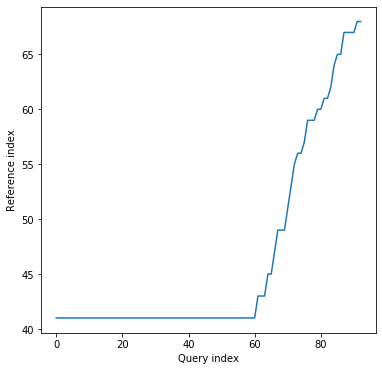

0.84375


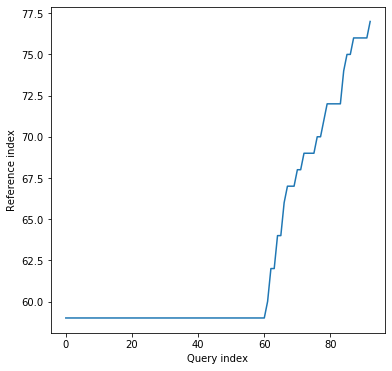

0.5625


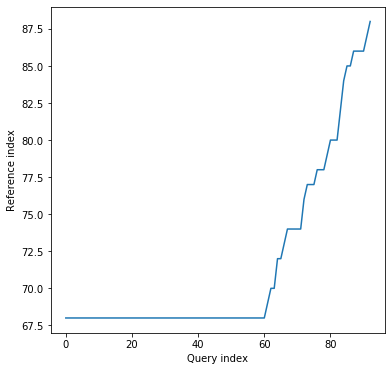

0.625


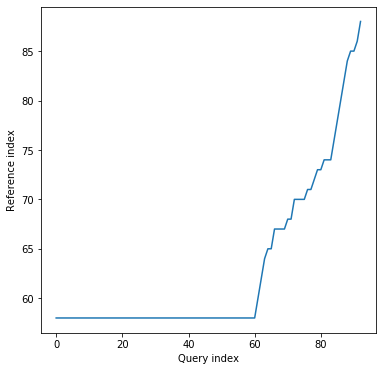

0.9375


In [21]:
x = deaths.loc[model[0][0]].to_numpy()
for i in range(1,5):
    y = JHU[JHU['Country/Region']==model[0][i]]['Deaths'].to_numpy()
    ds = dtw(x, y, dist_method='euclidean', step_pattern='asymmetric', keep_internals=True, open_begin=True, open_end=True)
    # wt = warp(ds, index_reference=False)
    ds.plot(type='alignment')
    startday = np.argwhere(ds.index2 == sorted(set(ds.index2))[1])[0,0] - 1
    slope = (ds.index2[-1] - ds.index2[startday])/(len(ds.index2) - startday - 1)
    print(slope)
    # plt.plot(x, label='query'); plt.plot(y[wt], label='ref'); plt.legend(); plt.gca().set_title(f'{model[0][1]}')

In [22]:
ref_idx = ds.index2.tolist().copy()
finaldayofprediction = int(np.ceil((len(y)-ref_idx[-1])/slope+len(ds.index2)-2))
for t in range(len(ds.index2), finaldayofprediction):
    ref_idx.append(int(np.floor(slope*(t-len(ds.index2)+1)+ds.index2[-1])))
# print(startday, slope, finaldayofprediction)
print(ref_idx[-1], len(ds.index2)) # Sanity check

92 93


In [23]:
for i in range(len(model)):
    if model[i][1]!='NaN':
        x = deaths.loc[model[i][0]].to_numpy()
        for j in range(1,6):
            y = JHU[JHU['Country/Region']==model[i][j]]['Deaths'].to_numpy()
            ds = dtw(x, y, dist_method='euclidean', step_pattern='asymmetric', open_begin=True, open_end=True)
            # ds.plot(type='alignment')
            if len(set(ds.index2))>1:
                startday = np.argwhere(ds.index2 == sorted(set(ds.index2))[1])[0,0] - 1
                slope = (ds.index2[-1] - ds.index2[startday])/(len(ds.index2) - startday - 1)
                ref_idx = ds.index2.tolist().copy()
                finaldayofprediction = int(np.ceil((len(y)-ref_idx[-1])/slope+len(ds.index2)-2))
                for t in range(len(ds.index2), finaldayofprediction):
                    ref_idx.append(int(np.floor(slope*(t-len(ds.index2)+1)+ds.index2[-1])))
                # final point = (len(ref_idx)-1, ref_idx[-1])
                # y = slope * (x - x_0)+y_0 < len(y)
                print(y[0], y[ref_idx][-5:])
                # wq = warp(ds, index_reference=False)
                # plt.plot(y); plt.plot(x[wq]); plt.gca().set_title(f'{model[i][1]}')

0 [82 82 83 83 83]
0 [160 160 168 168 174]
0 [55 58 58 60 63]
0 [48 49 51 53 54]
0 [77 77 77 79 79]
0 [48 48 48 50 51]
0 [22 24 24 24 24]
0 [77 79 79 79 80]
0 [168 168 168 174 174]
0 [426 426 454 454 494]
0 [629 687 735 785 854]
0 [610 610 687 730 794]
0 [1429 1478 1509 1549 1589]
0 [592 592 681 721 780]
0 [1765 1765 1937 2021 2152]
0 [14 14 14 14 14]
0 [43 43 44 44 44]
0 [225 225 239 239 262]
0 [19 19 19 20 20]
0 [10 10 12 12 12]
0 [19 20 20 20 25]
0 [214 214 214 214 214]
0 [2021 2021 2152 2152 2152]
0 [8 8 8 8 8]
0 [6 6 6 6 6]
0 [36 38 38 39 41]
0 [36 37 37 37 37]
0 [36 36 36 40 42]
0 [58 58 60 60 63]
0 [33 34 37 37 43]
0 [101 110 110 120 127]
0 [181 182 187 187 194]
0 [236 237 238 240 240]
0 [126 136 141 146 154]
0 [ 92 103 114 114 121]
0 [36 36 40 40 43]
0 [43 45 49 49 52]
0 [47 47 48 49 50]
0 [236 263 281 328 328]
0 [56 56 56 56 57]
0 [ 94  98 141 149 172]
0 [199 213 225 239 239]
0 [250 264 276 287 294]
0 [120 126 136 141 146]
0 [141 151 161 174 187]
0 [132 136 147 152 165]
0 [181

In [110]:
predict_DTW = {}
dict_similarity = {}
for fips in FIPS_deaths:
    x = deaths.loc[fips].to_numpy()
    costmtx = [[i, 0] for i in range(len(JHU_countries))]
    is_degenerated = False
    for i, country in enumerate(JHU_countries):
        y = JHU[JHU['Country/Region']==country]['Deaths'].to_numpy()
        ds = dtw(x, y, dist_method='euclidean', step_pattern='asymmetric', open_begin=True, open_end=True)
        if ds.normalizedDistance > 0:
            costmtx[i][1] = ds.normalizedDistance
        else:
            is_degenerated = True
            break
    if not is_degenerated:
        costmtx = np.array(costmtx)
        costmtx = costmtx[costmtx[:,1].argsort()]
        maxsim_countries = [JHU_countries[int(costmtx[i, 0])] for i in range(5)]
    else:
        maxsim_countries = None
    dict_similarity[fips] = maxsim_countries
    if maxsim_countries is not None:
        prediction_matrix = []
        for maxsim_country in maxsim_countries:
            y = JHU[JHU['Country/Region']==maxsim_country]['Deaths'].to_numpy()
            ds = dtw(x, y, dist_method='euclidean', step_pattern='asymmetric', open_begin=True, open_end=True)
            if len(set(ds.index2))>1:
                startday = np.argwhere(ds.index2 == sorted(set(ds.index2))[1])[0,0] - 1
                slope = (ds.index2[-1] - ds.index2[startday])/(len(ds.index2) - startday - 1)
                ref_idx = ds.index2.tolist().copy()
                finaldayofprediction = int(np.ceil((len(y)-ref_idx[-1])/slope+len(ds.index2)-2))
                for t in range(len(ds.index2), finaldayofprediction):
                    ref_idx.append(int(np.floor(slope*(t-len(ds.index2)+1)+ds.index2[-1])))
                # final point = (len(ref_idx)-1, ref_idx[-1])
                # y = slope * (x - x_0)+y_0 < len(y)
                # print([y[idx] for idx in ref_idx])
                prediction = (x.tolist()+[y[idx] for idx in ref_idx[len(x):]])[t_begin:]
                if len(prediction)>91:
                    prediction = prediction[:91]
                elif len(prediction)<91:
                    prediction += [np.NaN]*(91-len(prediction))
                prediction_matrix.append(np.array(prediction))
        prediction_max = np.nanmax(np.asarray(prediction_matrix), axis=0)
        prediction_min = np.nanmin(np.asarray(prediction_matrix), axis=0)
    else:
        prediction = np.empty(91+t_begin)
        prediction[:len(x)] = x
        prediction[len(x):] = np.NaN
        prediction_min = prediction[t_begin:]; prediction_max = prediction[t_begin:]
    predict_DTW[fips] = (prediction_min, prediction_max)

In [113]:
days_to_str = [f'2020-04-0{i}' for i in range(1, 10)] + [f'2020-04-{i}' for i in range(10, 31)] + [f'2020-05-0{i}' for i in range(1, 10)] + [f'2020-05-{i}' for i in range(10, 32)] + [f'2020-06-0{i}' for i in range(1, 10)] + [f'2020-06-{i}' for i in range(10, 31)]
fips = '06037'
pr_min, pr_max = predict_DTW[fips]

for i in range(15):
    a, b = np.linalg.solve(np.array([[norm.ppf(0.1), 1], [norm.ppf(0.9), 1]]), np.array([pr_min[i], pr_max[i]]))
    print(days_to_str[i] + f'-{fips}', a*np.array(norm.ppf(np.linspace(0.1, 0.9, num=9)))+b)

2020-04-01-06037 [65. 65. 65. 65. 65. 65. 65. 65. 65.]
2020-04-02-06037 [78. 78. 78. 78. 78. 78. 78. 78. 78.]
2020-04-03-06037 [89. 89. 89. 89. 89. 89. 89. 89. 89.]
2020-04-04-06037 [117. 117. 117. 117. 117. 117. 117. 117. 117.]
2020-04-05-06037 [132. 132. 132. 132. 132. 132. 132. 132. 132.]
2020-04-06-06037 [147. 147. 147. 147. 147. 147. 147. 147. 147.]
2020-04-07-06037 [169. 169. 169. 169. 169. 169. 169. 169. 169.]
2020-04-08-06037 [198. 198. 198. 198. 198. 198. 198. 198. 198.]
2020-04-09-06037 [223. 223. 223. 223. 223. 223. 223. 223. 223.]
2020-04-10-06037 [241. 241. 241. 241. 241. 241. 241. 241. 241.]
2020-04-11-06037 [265. 265. 265. 265. 265. 265. 265. 265. 265.]
2020-04-12-06037 [296. 296. 296. 296. 296. 296. 296. 296. 296.]
2020-04-13-06037 [320. 320. 320. 320. 320. 320. 320. 320. 320.]
2020-04-14-06037 [360. 360. 360. 360. 360. 360. 360. 360. 360.]
2020-04-15-06037 [402. 402. 402. 402. 402. 402. 402. 402. 402.]


In [114]:
days_to_str = [f'2020-04-0{i}' for i in range(1, 10)] + [f'2020-04-{i}' for i in range(10, 31)] + [f'2020-05-0{i}' for i in range(1, 10)] + [f'2020-05-{i}' for i in range(10, 32)] + [f'2020-06-0{i}' for i in range(1, 10)] + [f'2020-06-{i}' for i in range(10, 31)]

pred_quant = []
for fips in FIPS_deaths:
    pr_min, pr_max = predict_DTW[fips]
    for i in range(91):
        a, b = np.linalg.solve(np.array([[norm.ppf(0.1), 1], [norm.ppf(0.9), 1]]), np.array([pr_min[i], pr_max[i]]))
        pred_quant.append([days_to_str[i], fips] + list(a*np.array(norm.ppf(np.linspace(0.1, 0.9, num=9)))+b))

df_predict = pd.DataFrame(pred_quant, columns=['date', 'fips']+[f'{10*i}' for i in range(1,10)])
df_predict = fix_FIPS(df_predict, fipslabel='fips', datelabel='date', reduced=False)
df_predict.dropna(inplace=True)
df_predict[df_predict['fips']=='06037']

,date,fips,10,20,30,40,50,60,70,80,90
202,2020-04-01,06037,65.0,65.000000,65.000000,65.000000,65.0,65.000000,65.000000,65.000000,65.0
3341,2020-04-02,06037,78.0,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,78.000000,78.0
6480,2020-04-03,06037,89.0,89.000000,89.000000,89.000000,89.0,89.000000,89.000000,89.000000,89.0
9619,2020-04-04,06037,117.0,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,117.0
12758,2020-04-05,06037,132.0,132.000000,132.000000,132.000000,132.0,132.000000,132.000000,132.000000,132.0
15897,2020-04-06,06037,147.0,147.000000,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,147.0
19036,2020-04-07,06037,169.0,169.000000,169.000000,169.000000,169.0,169.000000,169.000000,169.000000,169.0
22175,2020-04-08,06037,198.0,198.000000,198.000000,198.000000,198.0,198.000000,198.000000,198.000000,198.0
25314,2020-04-09,06037,223.0,223.000000,223.000000,223.000000,223.0,223.000000,223.000000,223.000000,223.0
28453,2020-04-10,06037,241.0,241.000000,241.000000,241.000000,241.0,241.000000,241.000000,241.000000,241.0


In [115]:
from functools import reduce

reindexer = {}
for i in range(len(df_predict)):
    reindexer[df_predict.index[i]] = reduce((lambda x, y: x+f'-{int(y)}'), df_predict.iloc[i][['date', 'fips']].tolist())

df_predict = df_predict.rename(index=reindexer).rename_axis('id').drop(['date', 'fips'], axis=1)
df_predict.head()

,10,20,30,40,50,60,70,80,90
id,,,,,,,,,
2020-04-01-1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01-1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01-1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01-1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01-1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
YuLi = pd.read_csv('First91days_highlowdeath_daily.csv')
YuLi.set_index('id', inplace=True)
YuLi.head()

,10,20,30,40,50,60,70,80,90
id,,,,,,,,,
2020-04-01-10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01-10003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01-10005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01-1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-01-1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
YuLi.update(df_predict)

In [118]:
YuLi.loc['2020-04-01-1073']

10    0.0
20    0.0
30    0.0
40    0.0
50    0.0
60    0.0
70    0.0
80    0.0
90    0.0
Name: 2020-04-01-1073, dtype: float64

In [119]:
# YuLi = YuLi.astype(float)
YuLi.reset_index(inplace=True)
YuLi.head()

,id,10,20,30,40,50,60,70,80,90
0,2020-04-01-10001,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2020-04-01-10003,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
2,2020-04-01-10005,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,2020-04-01-1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-04-01-1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
# from datetime import datetime

# # YuLi[[f'{10*i}' for i in range(1,10)]] = YuLi[[f'{10*i}' for i in range(1,10)]].applymap(lambda x: np.floor(100*x)/100)
# mdhm = datetime.now().strftime('%m%d') + '_' + datetime.now().strftime('%H%M')
# YuLi.to_csv(f'{homedir}/submissions/submission_naiveDTW_{mdhm}.csv', index=False)

## ------------------------------------------------------------

In [33]:
manhattan_distance = lambda x,y: np.abs(x-y)

costfunction = []
x = JHU[JHU['Country/Region']=='US']['Deaths'].to_numpy()
for country in JHU_countries:
    y = JHU[JHU['Country/Region']==country]['Deaths'].to_numpy()
    ds = dtw(x, y, dist_method='euclidean', step_pattern='asymmetric', open_begin=True, open_end=True)
    costfunction.append(ds.normalizedDistance)

# costfunction

In [34]:
df = pd.DataFrame.from_dict({'country':JHU_countries, 'cost':costfunction})
df.head()

,country,cost
0,Afghanistan,6699.074468
1,Albania,6706.648936
2,Algeria,6559.372340
3,Andorra,6700.595745
4,Angola,6719.585106


In [35]:
df.sort_values(by=['cost']).head(10)

,country,cost
171,US,0.000000
84,Italy,1872.021277
156,Spain,2217.031915
16,Belgium,4890.691489
65,Germany,5122.627660
80,Iran,5268.138298
23,Brazil,5601.808511
170,Turkey,5904.648936
160,Sweden,6030.734043
161,Switzerland,6201.234043


In [36]:
df.sort_values(by=['cost']).head(10)

,country,cost
171,US,0.000000
84,Italy,1872.021277
156,Spain,2217.031915
16,Belgium,4890.691489
65,Germany,5122.627660
80,Iran,5268.138298
23,Brazil,5601.808511
170,Turkey,5904.648936
160,Sweden,6030.734043
161,Switzerland,6201.234043


In [37]:
from dtw import *

In [38]:
(query, reference) = dtw_test_data.sin_cos()

In [39]:
alignment = dtw(query, reference, step_pattern=asymmetric)

In [40]:
wq = warp(alignment, index_reference=False)
wt = warp(alignment,index_reference=True)

Text(0.5, 1.0, 'Warping query')

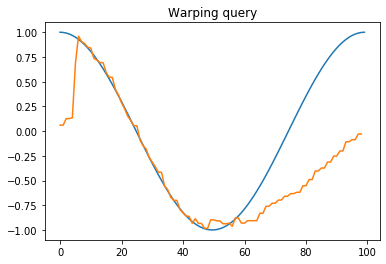

In [41]:
plt.plot(reference);plt.plot(query[wq]);plt.gca().set_title("Warping query")

Text(0.5, 1.0, 'Warping reference')

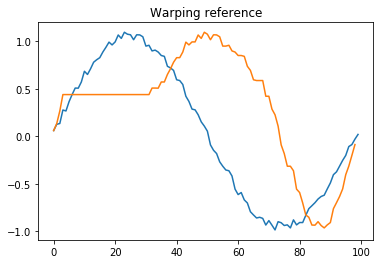

In [42]:
plt.plot(query);plt.plot(query[wt]);plt.gca().set_title("Warping reference")

Text(0.5, 1.0, 'Warping reference')

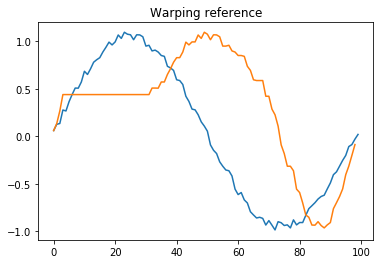

In [43]:
plt.plot(query);plt.plot(query[wt]);plt.gca().set_title("Warping reference")

In [55]:
model = []
for fips in FIPS_deaths:
    if fips[:2]=='06':
        x = deaths.loc[fips].to_numpy()
        costmatrix = np.zeros((len(JHU_countries), 2))
        is_degenerated = False
        for i, country in enumerate(JHU_countries):
            y = JHU[JHU['Country/Region']==country]['Deaths'].to_numpy()
            ds = dtw(x, y, dist_method='euclidean', step_pattern='asymmetric', open_begin=True, open_end=True)
            if ds.normalizedDistance>0:
                costmatrix[i] = [i, ds.normalizedDistance]
            else:
                is_degenerated = True
                break
        if not is_degenerated:
            costmatrix = costmatrix[costmatrix[:,1].argsort()]
            model.append([fips] + [JHU_countries[int(costmatrix[i, 0])] for i in range(5)])
        else:
            model.append([fips, 'NaN'])
model[0][1]

'Iraq'

[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 43 43 43 45 45 47 49 49 49 51 53
 55 56 56 57 59 59 59 60 60 61 61 62 64 65 65 67 67 67 67 68 68] [69, 70, 71, 72, 73, 73, 74, 75, 76, 77, 78, 78, 79, 80, 81, 82, 83, 84, 84, 85, 86, 87, 88, 89, 89, 90, 91, 92]
[59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 59 59 60 62 62 64 64 66 67 67 67 68 68
 69 69 69 69 70 70 71 72 72 72 72 72 74 75 75 76 76 76 76 76 77] [78, 78, 79, 79, 80, 80, 81, 82, 82, 83, 83, 84, 84, 85, 86, 86, 87, 87, 88, 88, 89, 89, 90, 91, 91, 92, 92, 93]
[68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68
 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68 68
 68 68 68 68 68 68 68 68 68 68 68 68 68 69 70 70 72 72 73 74

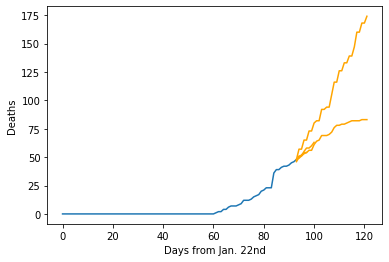

In [98]:
fig, ax = plt.subplots()
ax.plot(list(range(len(x))), x)
x = deaths.loc[model[0][0]].to_numpy()
for i in range(1,5):
    y = JHU[JHU['Country/Region']==model[0][i]]['Deaths'].to_numpy()
    ds = dtw(x, y, dist_method='euclidean', step_pattern='asymmetric', keep_internals=True, open_begin=True, open_end=True)
    startday = np.argwhere(ds.index2 == sorted(set(ds.index2))[1])[0,0] - 1
    slope = (ds.index2[-1] - ds.index2[startday])/(len(ds.index2) - startday - 1)
    ref_idx = ds.index2.tolist().copy()
    finaldayofprediction = int(np.ceil((len(y)-ref_idx[-1])/slope+len(ds.index2)-2))
    for t in range(len(ds.index2), finaldayofprediction):
        ref_idx.append(int(np.floor(slope*(t-len(ds.index2)+1)+ds.index2[-1])))
    # print(startday, slope, finaldayofprediction)
    print(ds.index2, ref_idx[len(ds.index2)+1:])
    ax.plot(list(range(len(x)-1, len(ref_idx))), [y[i] for i in ref_idx[len(x)-1:]], color='orange')
    # print(ref_idx[-1], len(ds.index2)) # Sanity check
    # print(ds.index2)
    # wt = warp(ds, index_reference=False)
    # ds.plot(type='alignment')
    # startday = np.argwhere(ds.index2 == sorted(set(ds.index2))[1])[0,0] - 1
    # slope = (ds.index2[-1] - ds.index2[startday])/(len(ds.index2) - startday - 1)
    # print(slope)
    # plt.plot(x, label='query'); plt.plot(y[wt], label='ref'); plt.legend(); plt.gca().set_title(f'{model[0][1]}')
plt.xlabel("Days from Jan. 22nd")
plt.ylabel("Deaths")
fig.show()

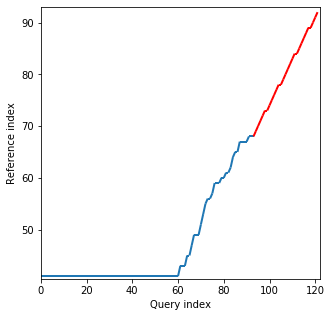

In [82]:
from matplotlib import collections  as mc

lines_org = [[(i,j),(i+1, ref_idx[i+1])] for i, j in enumerate(ref_idx[:len(ds.index2)])]
lc_org = mc.LineCollection(lines_org, linewidth=2)
lines_pred = [[(i+len(ds.index2),j),(i+1+len(ds.index2), ref_idx[i+1+len(ds.index2)])] for i, j in enumerate(ref_idx[len(ds.index2):-1])]
lc_pred = mc.LineCollection(lines_pred, linewidth=2, color='red')
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(0, len(ref_idx))
ax.set_ylim(ref_idx[0]-0.5, ref_idx[-1]+1)
ax.add_collection(lc_org)
ax.add_collection(lc_pred)
plt.xlabel("Query index")
plt.ylabel("Reference index")
fig.show()

In [84]:
y = JHU[JHU['Country/Region']==model[0][1]]['Deaths'].to_numpy()
print([y[i] for i in ref_idx])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 4, 4, 6, 7, 7, 7, 9, 10, 11, 12, 12, 13, 17, 17, 17, 20, 20, 23, 23, 27, 36, 40, 40, 42, 42, 42, 42, 46, 46, 46, 50, 52, 54, 54, 56, 56, 61, 64, 65, 69, 69, 69, 70, 72, 76, 78, 78, 79, 79, 80, 81, 82, 82, 82, 82, 83, 83, 83]


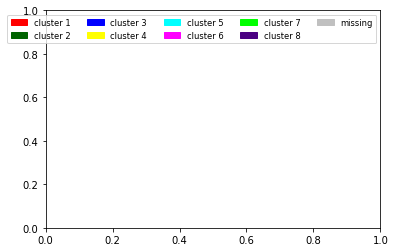

In [128]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
['red', 'darkgreen', 'blue', 'yellow', 'cyan', 'magenta', 'lime', 'indigo', 'silver']
patch1 = mpatches.Patch(color='red', label='cluster 1')
patch2 = mpatches.Patch(color='darkgreen', label='cluster 2')
patch3 = mpatches.Patch(color='blue', label='cluster 3')
patch4 = mpatches.Patch(color='yellow', label='cluster 4')
patch5 = mpatches.Patch(color='cyan', label='cluster 5')
patch6 = mpatches.Patch(color='magenta', label='cluster 6')
patch7 = mpatches.Patch(color='lime', label='cluster 7')
patch8 = mpatches.Patch(color='indigo', label='cluster 8')
patch9 = mpatches.Patch(color='silver', label='missing')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9], fontsize='small', ncol=5)

plt.show()